# Practice for 5510 Unsupervise Machine Learning 

# Mall's Customers

For the purposes of this project, we will be using the data from kaggle provided by Vijay Choudhary (link - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data ). This data set is created only for the learning purpose market basket analysis. I will demonstrate this by using unsuervise ML technique (KMeans Clustering Algorithm) in simplest form.



# EDA

### First Load Necessary Packages

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering



### Data Preprocessing

Data contain 200 customers. 
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

In [37]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The data has no missing data; however, the Gender column has object dtype. We will need to encode it into numeric form. We also don't need CustomerID for our model, so we will drop the CustomerID column.



In [39]:
df = df.drop(columns = 'CustomerID')


In [40]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<Axes: title={'center': 'Count (Gender)'}>

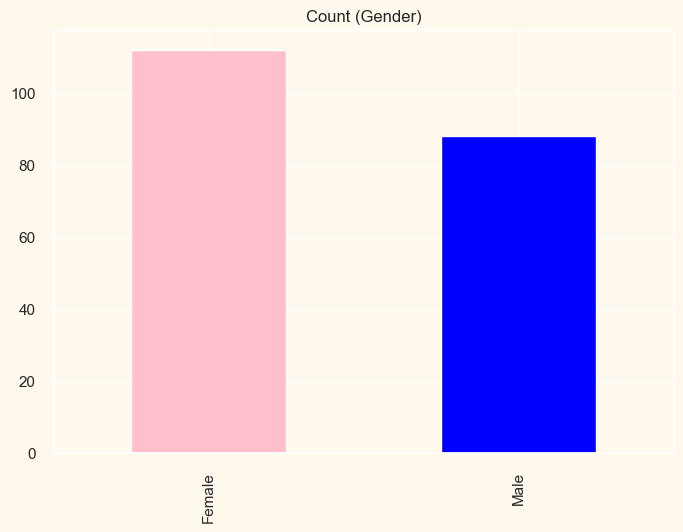

In [41]:
df['Gender'].value_counts().plot(kind='bar', title='Count (Gender)', color=['pink', 'blue'])


In [42]:
gender_LaEn = LabelEncoder()

df["Gender"] = gender_LaEn.fit_transform(df["Gender"])



In [43]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


<Axes: >

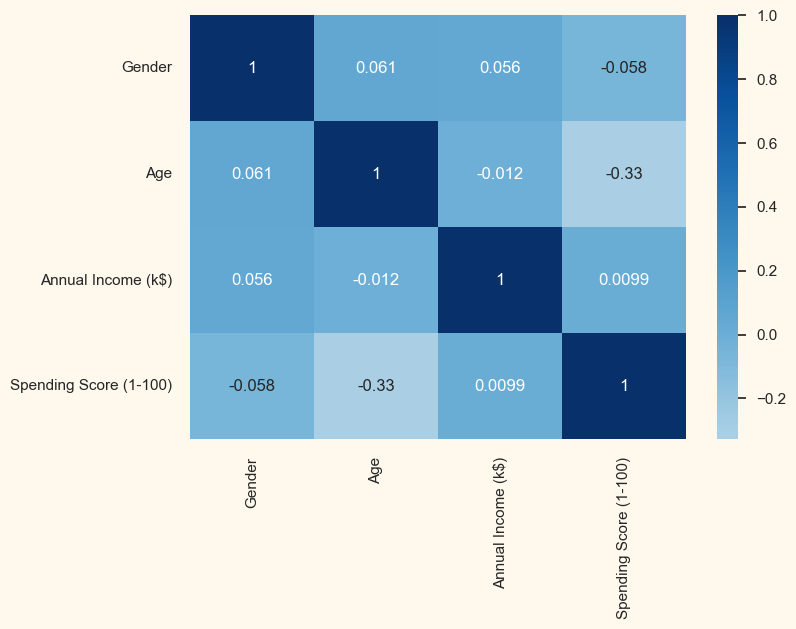

In [44]:
corrmat= df.corr()
sns.heatmap(corrmat,annot=True, cmap='Blues', center=0)

Reletive Plot


<Figure size 800x550 with 0 Axes>

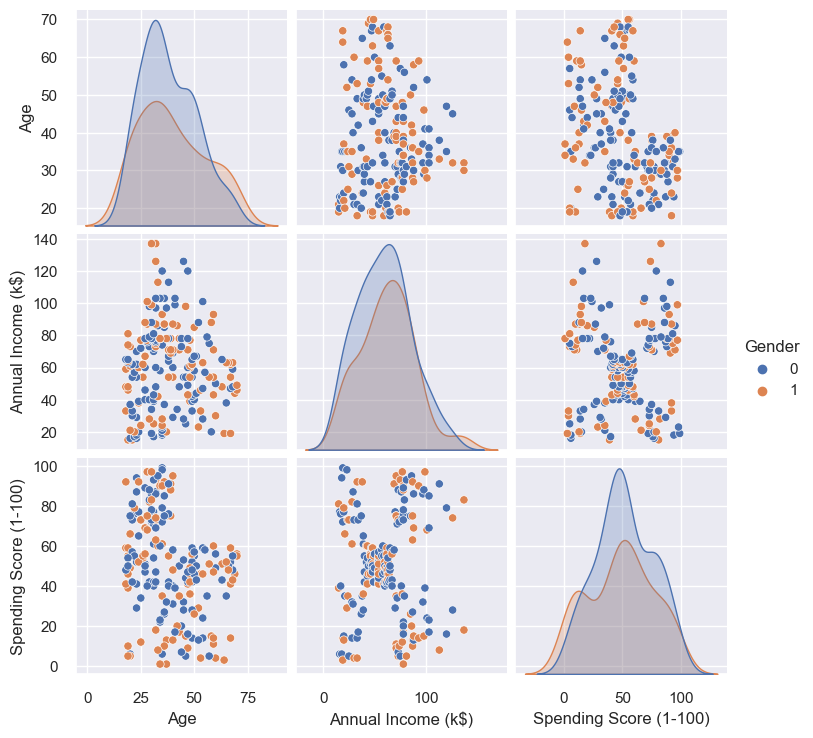

In [68]:
To_Plot = [ "Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
print("Reletive Plot")
plt.figure()
sns.pairplot(df[To_Plot], hue = 'Gender')
plt.show()


From the above we will do 3 k-mean model
1. Age Vs Annual Income
2. Age Vs Spending Score
3. Annual Incom Vs Spending Score

In [48]:
df_Age_Annual = df.drop(columns = ['Gender', 'Spending Score (1-100)'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

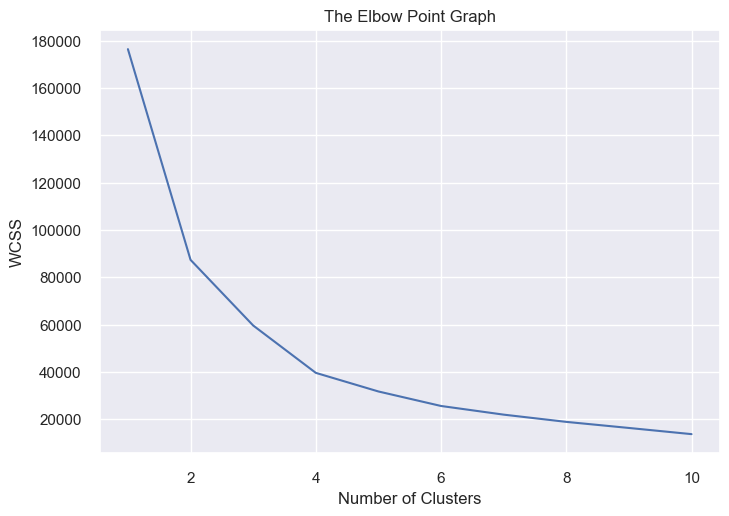

In [72]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=88)
    kmeans.fit(df_Age_Annual)

    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow graph above we will use 4 clusters to this model.

In [70]:
#Initiating the Agglomerative Clustering model with n = 4
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df_Age_Annual)
df_Age_Annual["Clusters"] = yhat_AC


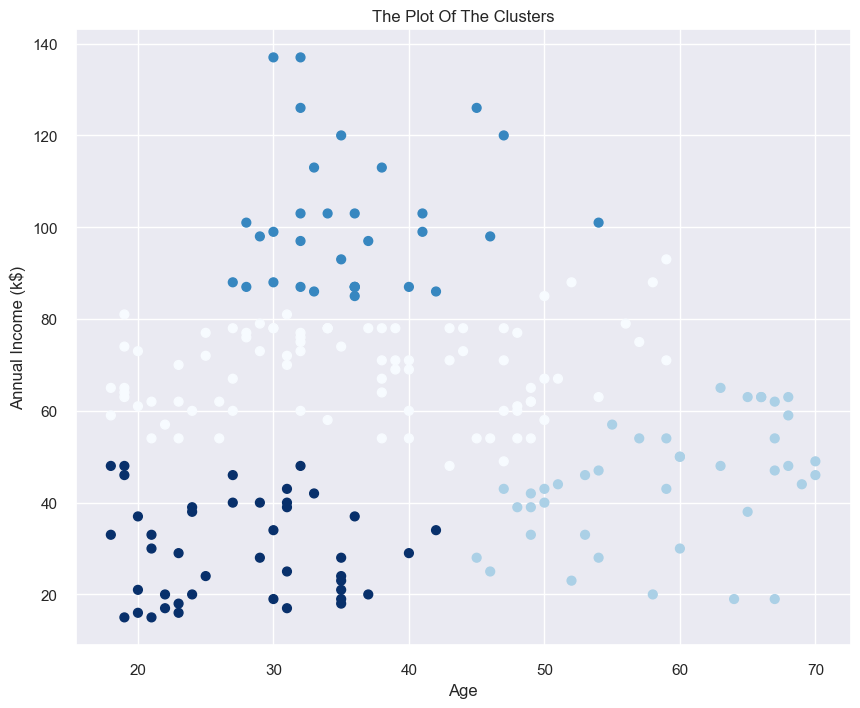

In [71]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x = df_Age_Annual['Age'], y=df_Age_Annual['Annual Income (k$)'], s=40, c=df_Age_Annual["Clusters"], marker='o', cmap = 'Blues' )
ax.set_title("The Plot Of The Clusters")
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

The from cluster graph using K-mean model, the 4 clusters separate 4 group as described below:
1. Young age and low annual income
2. Elder age with low annual income
3. Medium income in all age
4. High annual income in mid age.

In [52]:
df_Age_SpendingScore = df.drop(columns = ['Gender', 'Annual Income (k$)'])



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

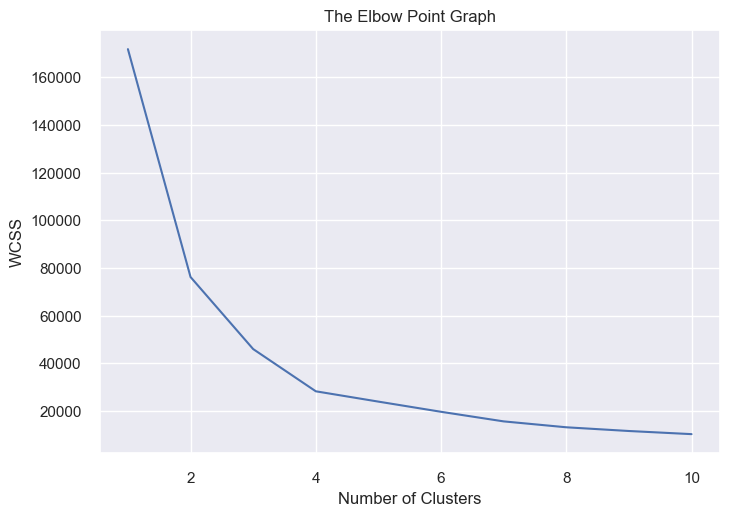

In [73]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=88)
    kmeans.fit(df_Age_SpendingScore)

    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow graph above we will use 4 clusters to this model.

In [74]:
#Initiating the Agglomerative Clustering model with n = 4
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df_Age_SpendingScore)
df_Age_SpendingScore["Clusters"] = yhat_AC

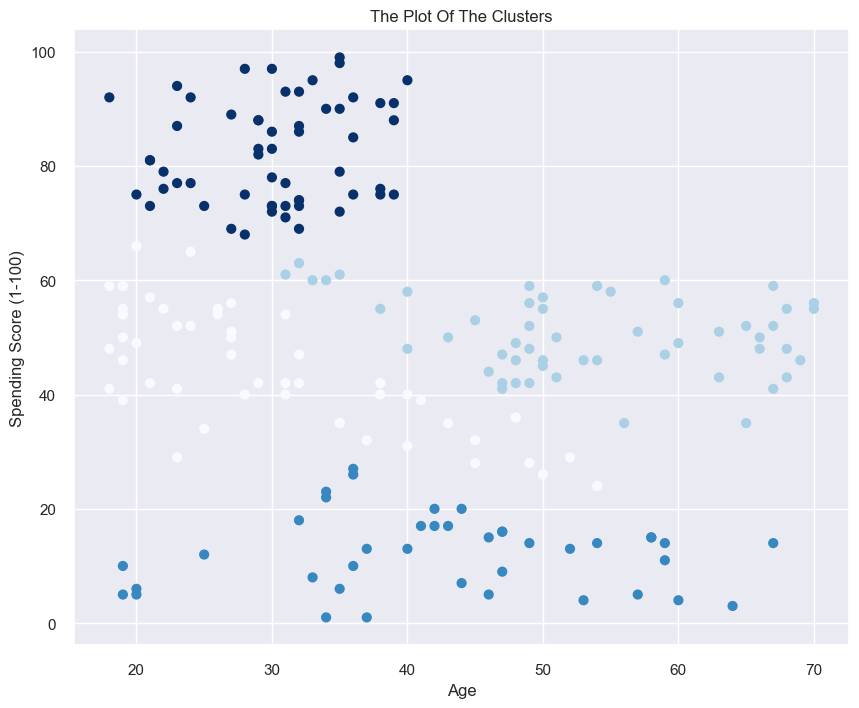

In [75]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x = df_Age_SpendingScore['Age'], y=df_Age_SpendingScore['Spending Score (1-100)'], s=40, c=df_Age_SpendingScore["Clusters"], marker='o', cmap = 'Blues' )
ax.set_title("The Plot Of The Clusters")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

The from cluster graph using K-mean model, the 4 clusters separate 4 group as described below:

1. Low spending score in all age
2. Middle spending score in young age
3. Middle spending score in elder age
4. High spending score in young age

In [56]:
df_Annual_SpendScore = df.drop(columns = ['Gender', 'Age'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

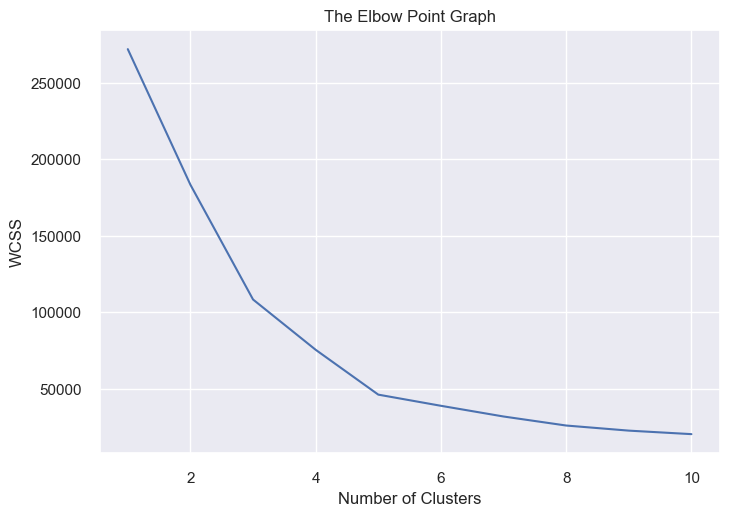

In [76]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=88)
    kmeans.fit(df_Annual_SpendScore)

    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow graph above we will use 5 clusters to this model.

In [79]:
#Initiating the Agglomerative Clustering model with n = 5
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df_Annual_SpendScore)
df_Annual_SpendScore["Clusters"] = yhat_AC

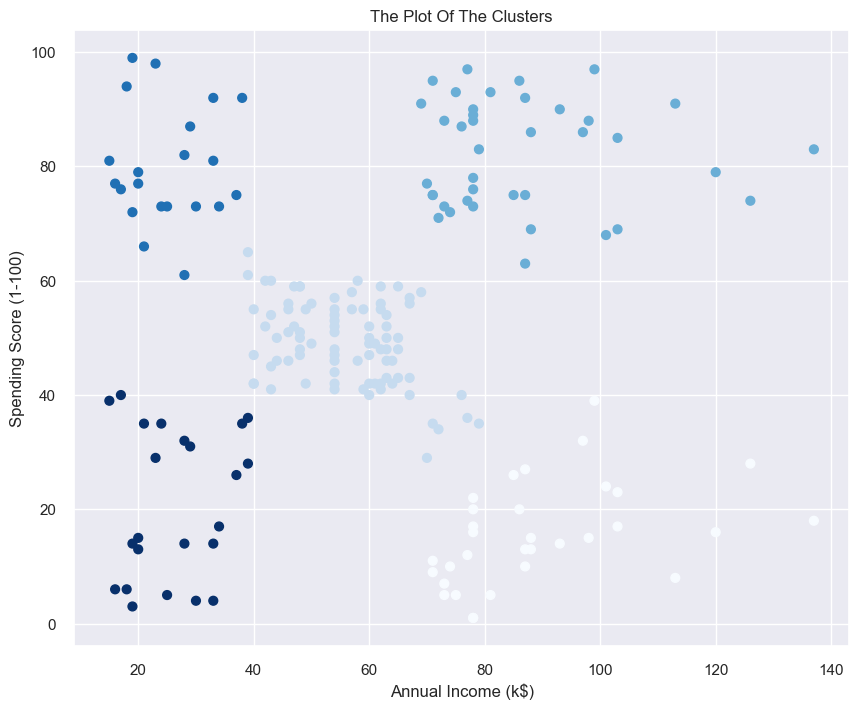

In [80]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x = df_Annual_SpendScore['Annual Income (k$)'], y=df_Annual_SpendScore['Spending Score (1-100)'], s=40, c=df_Annual_SpendScore["Clusters"], marker='o', cmap = 'Blues' )
ax.set_title("The Plot Of The Clusters")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

The from cluster graph using K-mean model, the 5 clusters separate 5 group as described below:

1. Low spending score in low annual income
2. Low spending score in high annual income
3. Middle spending score in middle annual income
4. High spending score in low annual income
5. High spending score in high annual income

# Conclusion 

From the data and models above, most of high income ($80K up) people are in the high 20 to mid 40.
High spending score (60+) people are in 20 to 40 
Based on the data, I would do more marketing to people whoes age are between 20 and 40 because they have a chance to spend more money at the mall (high spending score) and they do have purchasing power (high annual income).